In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')
plt.rcParams['image.cmap'] = 'Paired_r'
%matplotlib inline

### 1. Dataset

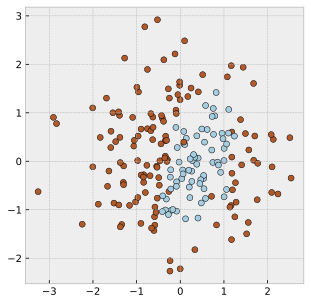

In [2]:
np.random.seed(5)

def f(X):
    X = X.copy()
    X[:,0] -= 0.4
    X[:,1] += 0.2
    return 1.1*X[:,0]**2 + 0.3*X[:,1]**2 - 0.6*X[:,0]*X[:,1]
def make_data():
    N = 200
    X = np.random.normal(size=(N, 2))
    Y = f(X) < 0.5
    X += np.random.normal(size=(N,2), scale=0.2)
    return X, Y

X, Y = make_data()


plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k');
#dataset = pd.read_csv("data.csv")
#dataset

In [3]:
print(X)

[[ 2.61808687e-01 -2.04327780e-01]
 [ 2.53780222e+00 -3.46922612e-01]
 [ 2.46607024e-01  1.51024228e+00]
 [-1.02471839e+00 -8.38582558e-01]
 [ 2.64699204e-01 -4.15707956e-01]
 [-1.30454987e+00 -4.34676506e-01]
 [-6.31860102e-01  4.45623800e-01]
 [-1.51879657e+00 -8.62955411e-01]
 [ 1.44036291e+00  1.93898290e+00]
 [-1.47956653e+00  4.04199378e-01]
 [-5.89890149e-01 -1.14497985e+00]
 [-7.65064161e-01 -8.36422645e-02]
 [ 9.56650382e-01  5.75716135e-01]
 [ 5.53446187e-02 -1.80178359e-01]
 [ 2.75030289e-01  1.49570948e-02]
 [ 5.79170195e-01 -7.66409590e-01]
 [ 3.44867021e-02 -3.56300644e-01]
 [-1.00368817e-01  6.97408373e-01]
 [-1.38322920e-02  1.56696038e+00]
 [-2.73472493e-01  1.49338752e+00]
 [-3.19879247e-01 -7.78836048e-01]
 [ 7.97222221e-02  6.14802638e-01]
 [ 4.13050906e-01  1.43151760e+00]
 [ 9.78443411e-01  4.65430042e-01]
 [-2.95871679e-01  3.51255636e-02]
 [ 1.68190039e+00  2.13879760e-02]
 [-9.70863515e-01 -7.46808479e-01]
 [-6.27840626e-01  9.10515398e-01]
 [-1.20723002e-01  2

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
print(Y)


[1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1]


### 1. Dataset

In [5]:
# dataset = pd.read_csv("data.csv")
# dataset

In [6]:
# Convert NumPy arrays to pandas DataFrames
X_df = pd.DataFrame(X, columns=['x1', 'x2'])
Y_df = pd.DataFrame(Y, columns=['y'])
y=Y_df.values
# Concatenate X_df and Y_df along the columns axis
dataset = pd.concat([X_df, Y_df], axis=1)
#X = dataset[['x1', 'x2']].values
# y = Y.values
# Y=dataset[['class']]
#print(X)
#print(y)
dataset

,x1,x2,y
0,0.261809,-0.204328,1
1,2.537802,-0.346923,0
2,0.246607,1.510242,0
3,-1.024718,-0.838583,0
4,0.264699,-0.415708,1
...,...,...,...
195,1.519671,-1.497403,0
196,1.380317,0.857821,0
197,-0.975477,0.013292,0
198,2.237693,-0.674783,0


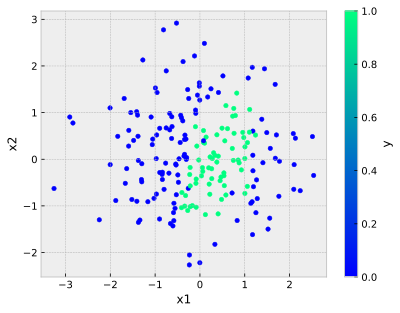

In [7]:
dataset.plot.scatter(x='x1',y='x2', c='y', colormap='winter')
plt.show()

In [8]:
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    return res
degree=2
Poly_X=mapFeature(X[:, 0],X[:, 1],degree)
print(Poly_X)
print(Poly_X.shape)

[[ 1.00000000e+00  2.61808687e-01 -2.04327780e-01  6.85437888e-02
  -5.34947877e-02  4.17498415e-02]
 [ 1.00000000e+00  2.53780222e+00 -3.46922612e-01  6.44044010e+00
  -8.80420973e-01  1.20355298e-01]
 [ 1.00000000e+00  2.46607024e-01  1.51024228e+00  6.08150245e-02
   3.72436355e-01  2.28083174e+00]
 ...
 [ 1.00000000e+00 -9.75477103e-01  1.32918443e-02  9.51555578e-01
  -1.29658898e-02  1.76673125e-04]
 [ 1.00000000e+00  2.23769296e+00 -6.74782523e-01  5.00726977e+00
  -1.50995610e+00  4.55331453e-01]
 [ 1.00000000e+00  1.24015578e+00  5.19156350e-01  1.53798636e+00
   6.43834748e-01  2.69523316e-01]]
(200, 6)


### 2. Modèle


In [9]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
def initialisation(X):
    np.random.seed(0)
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [11]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût 

In [12]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [13]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [14]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [15]:
def predict(X, W, b):
    A = modele(X, W, b)
    #print(A)
    return A >= 0.5

### 5. Modèle final

In [16]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

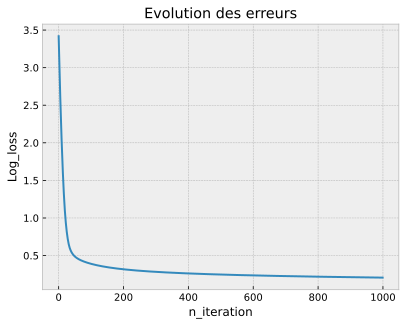

In [17]:
W,b=regression_logistique(Poly_X, y, learning_rate=0.1, n_iter=1000)

### 5. 1 Evaluation du modèle et Visualisation


In [18]:
from sklearn.metrics import accuracy_score
y_pred = predict(Poly_X, W, b)
print("Accuracy=",np.round(accuracy_score(y, y_pred)*100),'%')

Accuracy= 94.0 %


In [19]:

from sklearn.metrics import confusion_matrix
y_pred = predict(Poly_X, W, b)
cm = confusion_matrix(y, y_pred)
print(cm)

[[124   8]
 [  4  64]]


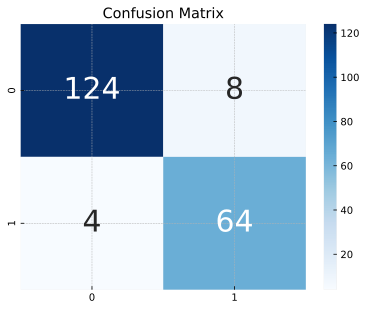

In [20]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

u [-3.         -2.90816327 -2.81632653 -2.7244898  -2.63265306 -2.54081633
 -2.44897959 -2.35714286 -2.26530612 -2.17346939 -2.08163265 -1.98979592
 -1.89795918 -1.80612245 -1.71428571 -1.62244898 -1.53061224 -1.43877551
 -1.34693878 -1.25510204 -1.16326531 -1.07142857 -0.97959184 -0.8877551
 -0.79591837 -0.70408163 -0.6122449  -0.52040816 -0.42857143 -0.33673469
 -0.24489796 -0.15306122 -0.06122449  0.03061224  0.12244898  0.21428571
  0.30612245  0.39795918  0.48979592  0.58163265  0.67346939  0.76530612
  0.85714286  0.94897959  1.04081633  1.13265306  1.2244898   1.31632653
  1.40816327  1.5       ] 

U= [[-3.         -2.90816327 -2.81632653 ...  1.31632653  1.40816327
   1.5       ]
 [-3.         -2.90816327 -2.81632653 ...  1.31632653  1.40816327
   1.5       ]
 [-3.         -2.90816327 -2.81632653 ...  1.31632653  1.40816327
   1.5       ]
 ...
 [-3.         -2.90816327 -2.81632653 ...  1.31632653  1.40816327
   1.5       ]
 [-3.         -2.90816327 -2.81632653 ...  1.31632653  

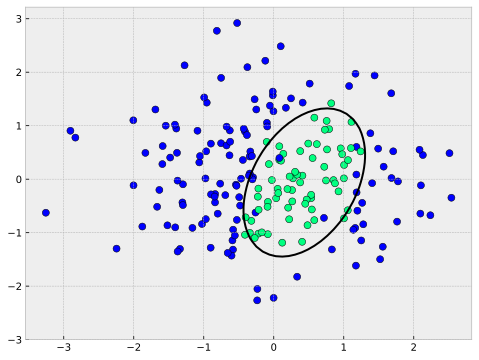

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.winter, s=50, edgecolors='k')
u = np.linspace(-3, 1.5, 50)
v = np.linspace(-3, 1.5, 50)
print('u',u,'\n')
U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
print('U=',U,'\n')
print('V=',V,'\n')

U = np.ravel(U)
V = np.ravel(V)

print('U applati=',U,'\n')
print('V applati=',V,'\n')
Z = np.zeros((len(u) * len(v)))

    
# Feature mapping
X_poly = mapFeature(U, V, degree)
Z = X_poly.dot(W)+b

print('Z=', Z,'\n')

# reshape U, V, Z back to matrix
U = U.reshape((len(u), len(v)))
print('U.shape',U.shape)

V = V.reshape((len(u), len(v)))
print('V.shape',V.shape)

Z = Z.reshape((len(u), len(v)))
print('Z.shape',Z.shape)

plt.grid(True)
plt.contour(U,V,Z,levels=[0],cmap= "Greys_r")